**Import Libraries**

In [1]:
import warnings
warnings.filterwarnings("ignore")
from numpy import asarray
import numpy as np
import pandas as pd
from PIL import Image
import cv2
import glob
import os 
import random
import subprocess
import matplotlib.pyplot as plt
from skimage.io import imread
from matplotlib.patches import Rectangle
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, Input, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

**Import Dataset**

Calling the images from directory

There is 5 differente folder for each class. We have to call them to the different variables. For this purpose, I create 5 empty lists and with some for loop for iterating in folders with os.listdir. After that we can use a if for add images with png or jpg formats. You can see these methods in the cell below.

In [2]:
image_list_other = []
image_list_safe = []
image_list_talking = []
image_list_text = []
image_list_turn = []

In [3]:
for other in os.listdir("/kaggle/input/revitsone-5class/Revitsone-5classes/other_activities"): 
    if other.endswith(".png") or other.endswith(".jpg"): 
        image_list_other.append(os.path.join("/kaggle/input/revitsone-5class/Revitsone-5classes/other_activities",
                                             other))
        #print(os.path.join("/kaggle/input/revitsone-5class/Revitsone-5classes/other_activities", other))

In [4]:
for safe in os.listdir("/kaggle/input/revitsone-5class/Revitsone-5classes/safe_driving"): 
    if safe.endswith(".png") or safe.endswith(".jpg"): 
        image_list_safe.append(os.path.join("/kaggle/input/revitsone-5class/Revitsone-5classes/safe_driving", 
                                            safe))
        #print(os.path.join("/kaggle/input/revitsone-5class/Revitsone-5classes/safe_driving",safe))

In [5]:
for talking in os.listdir("/kaggle/input/revitsone-5class/Revitsone-5classes/talking_phone"): 
    if talking.endswith(".png") or talking.endswith(".jpg"): 
        image_list_talking.append(os.path.join("/kaggle/input/revitsone-5class/Revitsone-5classes/talking_phone", 
                                               talking))
        #print(os.path.join("/kaggle/input/revitsone-5class/Revitsone-5classes/talking_phone",talking))

In [6]:
for text in os.listdir("/kaggle/input/revitsone-5class/Revitsone-5classes/texting_phone"): 
    if text.endswith(".png") or text.endswith(".jpg"): 
        image_list_text.append(os.path.join("/kaggle/input/revitsone-5class/Revitsone-5classes/texting_phone",
                                            text))
        #print(os.path.join("/kaggle/input/revitsone-5class/Revitsone-5classes/texting_phone",text))

In [7]:
for turn in os.listdir("/kaggle/input/revitsone-5class/Revitsone-5classes/turning"): 
    if turn.endswith(".png") or turn.endswith(".jpg"): 
        image_list_turn.append(os.path.join("/kaggle/input/revitsone-5class/Revitsone-5classes/turning",
                                            turn))
        #print(os.path.join("/kaggle/input/revitsone-5class/Revitsone-5classes/turning",turn))

**Pre Modeling**

1. Delete unreadable images

Sometimes we have some unreadable images that machine cannot read these images. There are two ways for handling these images. 1- Finding these images on our own way and exploring in the dataset if the dataset has little images (like this case). 2- We can create some functions that allow machine to iterate in images for finding out that which images are readable or not.

In [8]:
image_list_other.remove('/kaggle/input/revitsone-5class/Revitsone-5classes/other_activities/img_79.jpg')
image_list_other.remove('/kaggle/input/revitsone-5class/Revitsone-5classes/other_activities/img_4664.jpg')
image_list_other.remove('/kaggle/input/revitsone-5class/Revitsone-5classes/other_activities/img_7973.jpg')
image_list_other.remove('/kaggle/input/revitsone-5class/Revitsone-5classes/other_activities/img_13318.jpg')
image_list_other.remove('/kaggle/input/revitsone-5class/Revitsone-5classes/other_activities/img_13396.jpg')
image_list_other.remove('/kaggle/input/revitsone-5class/Revitsone-5classes/other_activities/img_13541.jpg')
image_list_other.remove('/kaggle/input/revitsone-5class/Revitsone-5classes/other_activities/img_13625.jpg')
image_list_other.remove('/kaggle/input/revitsone-5class/Revitsone-5classes/other_activities/img_20398.jpg')
image_list_other.remove('/kaggle/input/revitsone-5class/Revitsone-5classes/other_activities/img_22266.jpg')

image_list_turn.remove('/kaggle/input/revitsone-5class/Revitsone-5classes/turning/img_8771.jpg')
image_list_turn.remove('/kaggle/input/revitsone-5class/Revitsone-5classes/turning/img_62337.jpg')
image_list_turn.remove('/kaggle/input/revitsone-5class/Revitsone-5classes/turning/img_67523.jpg')
image_list_turn.remove('/kaggle/input/revitsone-5class/Revitsone-5classes/turning/img_70552.jpg')
image_list_turn.remove('/kaggle/input/revitsone-5class/Revitsone-5classes/turning/img_84605.jpg')
image_list_turn.remove('/kaggle/input/revitsone-5class/Revitsone-5classes/turning/img_101434.jpg')

In [9]:
font = {'family':'Times New Roman','color':'#1f211f'}
background_color = '#fab72f'

2. Plot random images from each class

This part is for better understanding the images that we have.

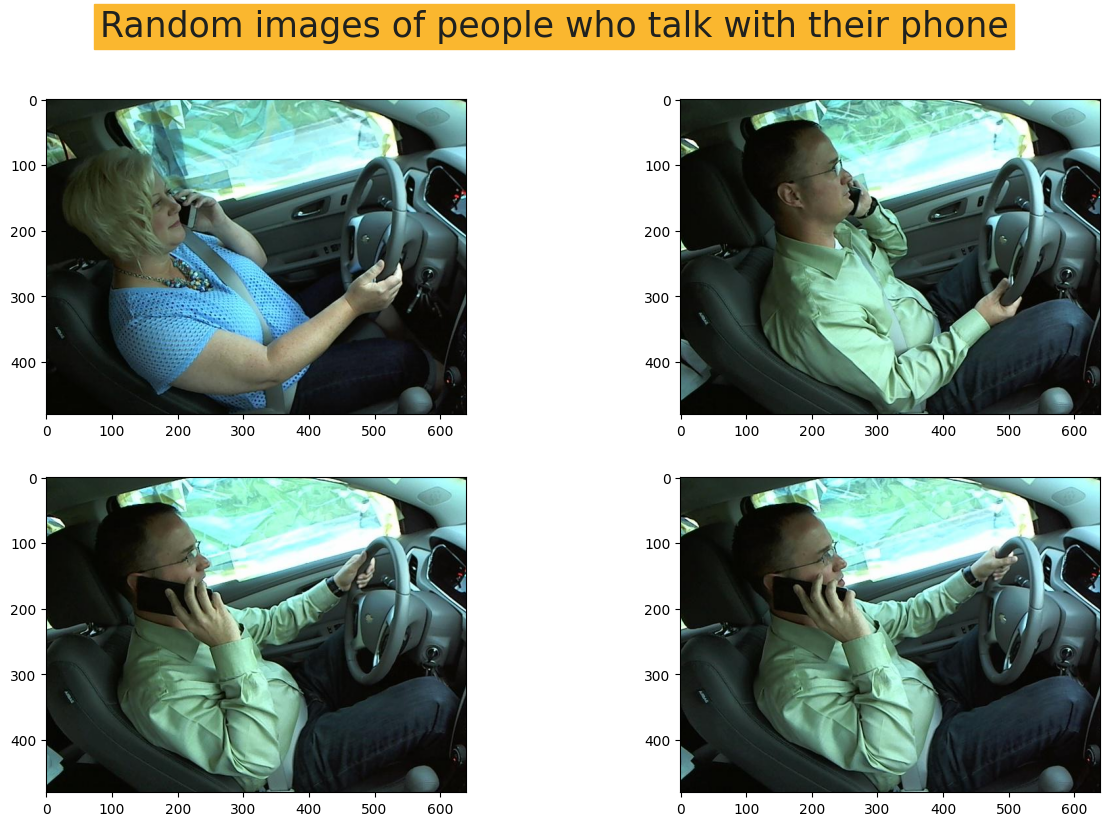

In [10]:
plt.figure(1, figsize=(15, 9))
plt.axis('off')
n = 0
for i in range(4):
    
    n += 1
    random_img = random.choice(image_list_talking)
    imgs = imread(random_img)
    plt.suptitle("Random images of people who talk with their phone",
                 fontdict = font, fontsize=25
                 ,backgroundcolor= background_color)
    plt.subplot(2,2,n)
    plt.imshow(imgs)

plt.show()

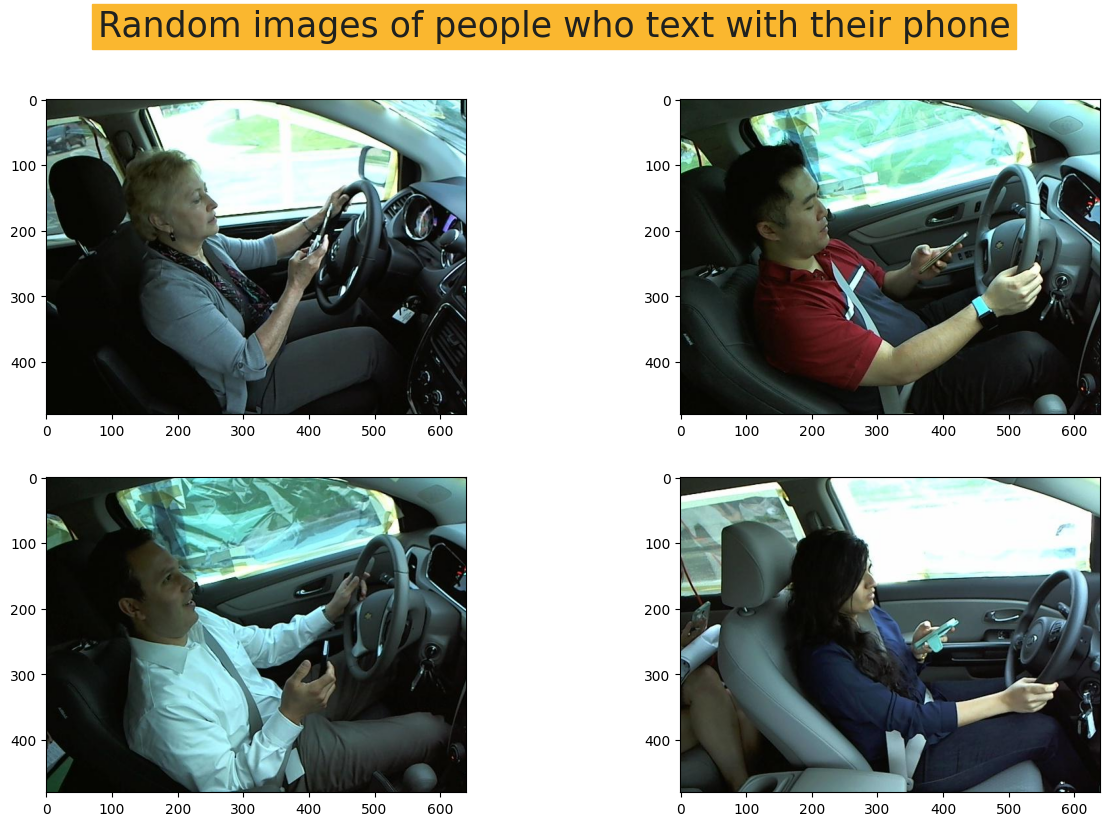

In [11]:
plt.figure(1, figsize=(15, 9))
plt.axis('off')
n = 0
for i in range(4):
    
    n += 1
    random_img = random.choice(image_list_text)
    imgs = imread(random_img)
    plt.suptitle("Random images of people who text with their phone",
                 fontdict = font, fontsize=25
                 ,backgroundcolor=background_color)
    plt.subplot(2,2,n)
    plt.imshow(imgs)

plt.show()

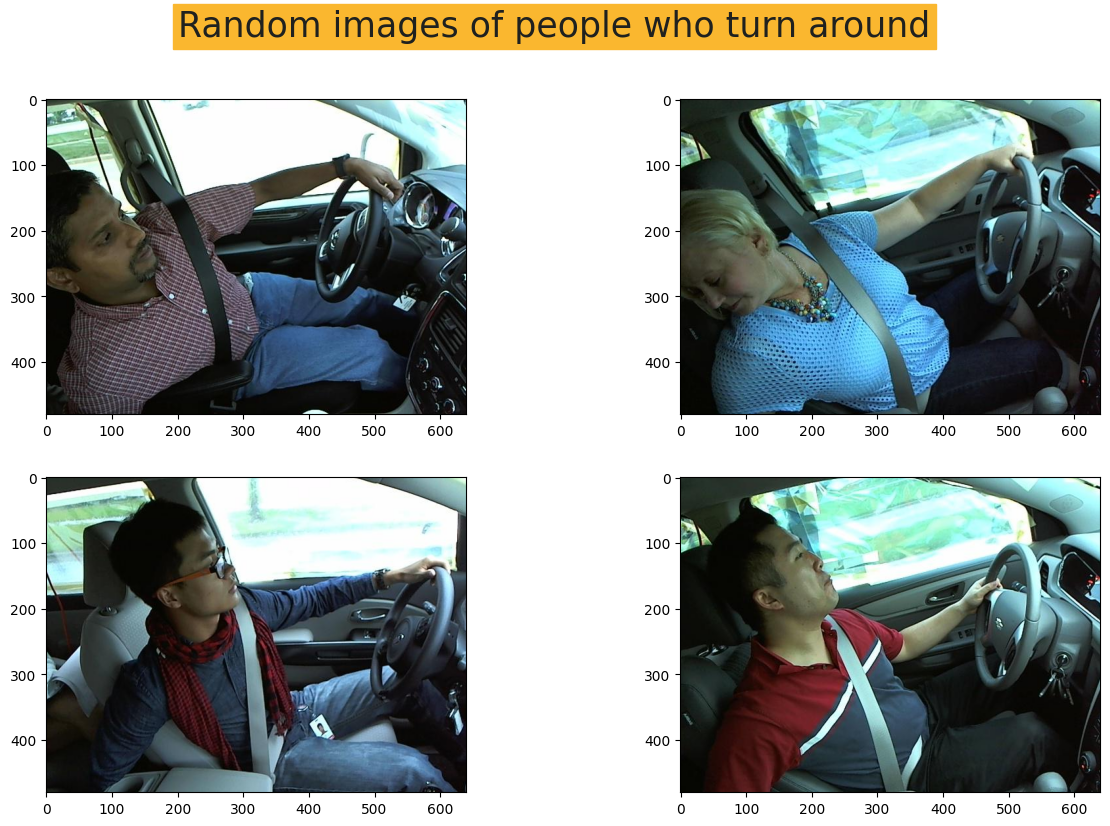

In [12]:
plt.figure(1, figsize=(15, 9))
plt.axis('off')
n = 0
for i in range(4):
    
    n += 1
    random_img = random.choice(image_list_turn)
    imgs = imread(random_img)
    plt.suptitle("Random images of people who turn around",
                 fontdict = font, fontsize=25
                 ,backgroundcolor=background_color)
    plt.subplot(2,2,n)
    plt.imshow(imgs)

plt.show()

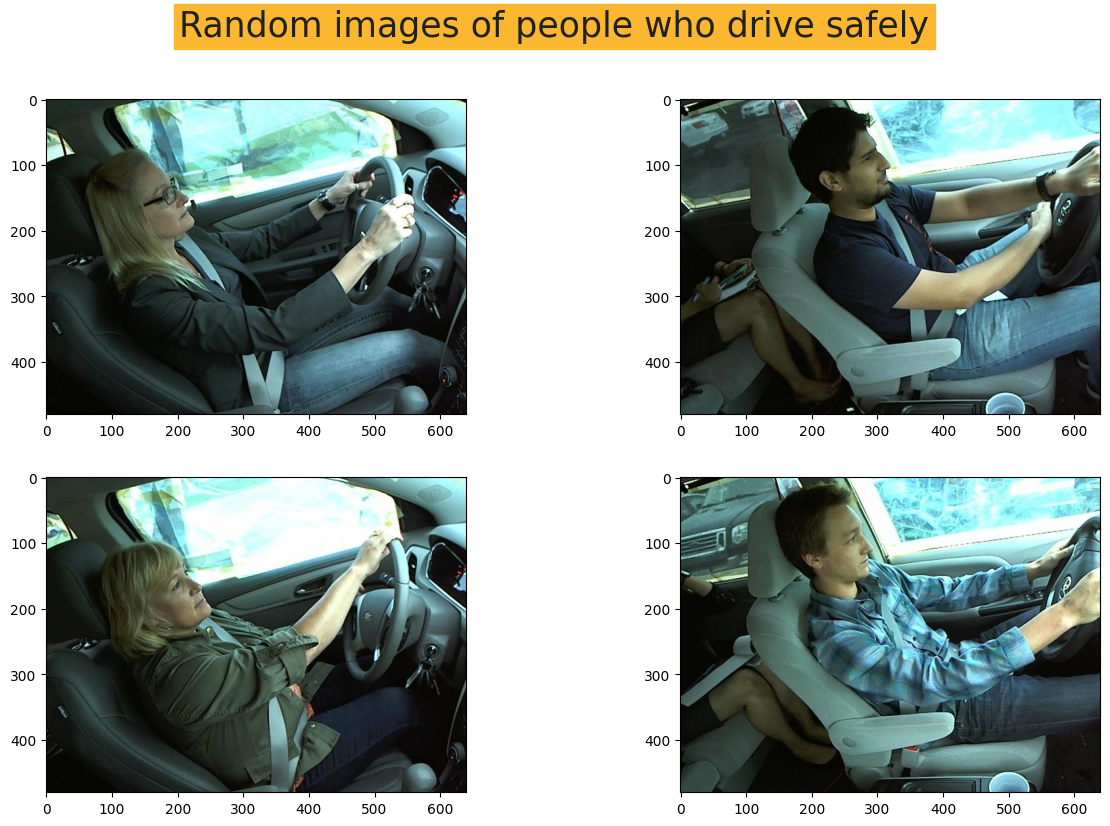

In [13]:
plt.figure(1, figsize=(15, 9))
plt.axis('off')
n = 0
for i in range(4):
    
    n += 1
    random_img = random.choice(image_list_safe)
    imgs = imread(random_img)
    plt.suptitle("Random images of people who drive safely",
                 fontdict = font, fontsize=25
                 ,backgroundcolor=background_color)
    plt.subplot(2,2,n)
    plt.imshow(imgs)

plt.show()

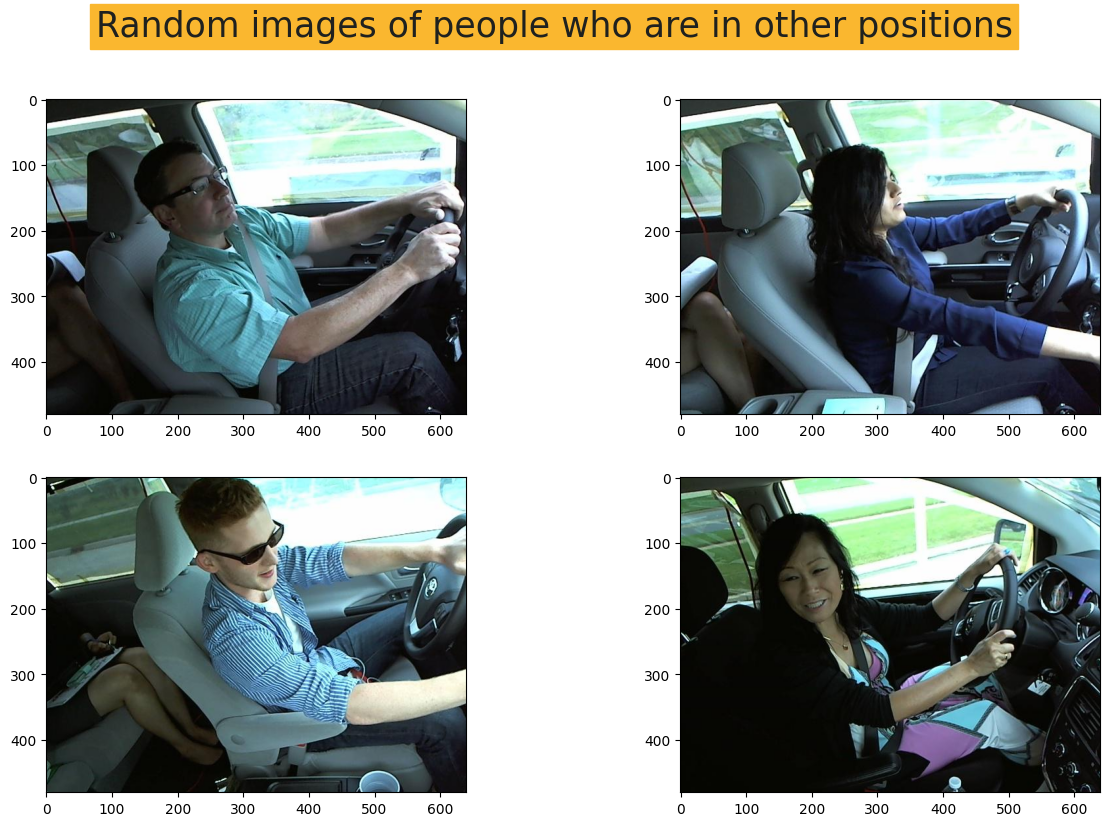

In [14]:
plt.figure(1, figsize=(15, 9))
plt.axis('off')
n = 0
for i in range(4):
    
    n += 1
    random_img = random.choice(image_list_other)
    imgs = imread(random_img)
    plt.suptitle("Random images of people who are in other positions",
                 fontdict = font, fontsize=25
                 ,backgroundcolor=background_color)
    plt.subplot(2,2,n)
    plt.imshow(imgs)

plt.show()

3. Split data to train, test, prediction

I deciede to devide dataset in this situation: 1- train = 75%, 2- test = 15% and 3- valid = 5%

In [15]:
print("Number of samples in (Class = Other) = " ,len(image_list_other))
print("Number of samples in (Class = Safe Driving) = " ,len(image_list_safe))
print("Number of samples in (Class = Talking Phone) = " ,len(image_list_talking))
print("Number of samples in (Class = Texting Phone) = " ,len(image_list_text))
print("Number of samples in (Class = Turning) = " ,len(image_list_turn))

Number of samples in (Class = Other) =  2119
Number of samples in (Class = Safe Driving) =  2203
Number of samples in (Class = Talking Phone) =  2169
Number of samples in (Class = Texting Phone) =  2203
Number of samples in (Class = Turning) =  2057


In [16]:
print(.75*len(image_list_other) , .2*len(image_list_other) ,.05*len(image_list_other))
print(.75*len(image_list_safe) , .2*len(image_list_safe) ,.05*len(image_list_safe))
print(.75*len(image_list_talking) , .2*len(image_list_talking) ,.05*len(image_list_talking))
print(.75*len(image_list_text) , .2*len(image_list_text) ,.05*len(image_list_text))
print(.75*len(image_list_turn) , .2*len(image_list_turn) ,.05*len(image_list_turn))

1589.25 423.8 105.95
1652.25 440.6 110.15
1626.75 433.8 108.45
1652.25 440.6 110.15
1542.75 411.40000000000003 102.85000000000001


In [17]:
print("Train","Test", "Valid")

train_other = image_list_other[:1589]
test_other = image_list_other[1589:2012]
valid_other = image_list_other[2012:]

print (len(train_other), len(test_other), len(valid_other))

train_safe = image_list_safe[:1652]
test_safe = image_list_safe[1652:2092]
valid_safe = image_list_safe[2092:]

print (len(train_safe), len(test_safe), len(valid_safe))

train_talking = image_list_talking[:1626]
test_talking = image_list_talking[1626:2059]
valid_talking = image_list_talking[2059:]

print (len(train_talking), len(test_talking), len(valid_talking))

train_text = image_list_text[:1652]
test_text = image_list_text[1652:2092]
valid_text = image_list_text[2092:]

print (len(train_text), len(test_text), len(valid_text))

train_turn = image_list_turn[:1547]
test_turn = image_list_turn[1547:1959]
valid_turn = image_list_turn[1959:]

print (len(train_turn), len(test_turn), len(valid_turn))

Train Test Valid
1589 423 107
1652 440 111
1626 433 110
1652 440 111
1547 412 98


4. Create dataframes for train, test, prediction

If you don't want to use directly from the directories and you want to create some lists of images, you can turn the format of data to dataframes and use flow from dataframe method that we see in the next cells. For this approach, create a label column for use it as a tag or label

In [18]:
train_other_df = pd.DataFrame({'image':train_other, 'label':'Other'})
train_safe_df = pd.DataFrame({'image':train_safe, 'label':'Safe'})
train_talking_df = pd.DataFrame({'image':train_talking, 'label':'Talk'})
train_text_df = pd.DataFrame({'image':train_text, 'label':'Text'})
train_turn_df = pd.DataFrame({'image':train_turn, 'label':'Turn'})

In [19]:
test_other_df = pd.DataFrame({'image':test_other, 'label':'Other'})
test_safe_df = pd.DataFrame({'image':test_safe, 'label':'Safe'})
test_talking_df = pd.DataFrame({'image':test_talking, 'label':'Talk'})
test_text_df = pd.DataFrame({'image':test_text, 'label':'Text'})
test_turn_df = pd.DataFrame({'image':test_turn, 'label':'Turn'})

In [20]:
valid_other_df = pd.DataFrame({'image':valid_other, 'label':'Other'})
valid_safe_df = pd.DataFrame({'image':valid_safe, 'label':'Safe'})
valid_talking_df = pd.DataFrame({'image':valid_talking, 'label':'Talk'})
valid_text_df = pd.DataFrame({'image':valid_text, 'label':'Text'})
valid_turn_df = pd.DataFrame({'image':valid_turn, 'label':'Turn'})

In [21]:
train_df = pd.concat([train_other_df, train_safe_df, train_talking_df, train_text_df, train_turn_df])
test_df = pd.concat([test_other_df, test_safe_df, test_talking_df, test_text_df, test_turn_df])
val_df = pd.concat([valid_other_df, valid_safe_df, valid_talking_df, valid_text_df, valid_turn_df])

In [22]:
train_df.head()

image  label
0  /kaggle/input/revitsone-5class/Revitsone-5clas...  Other
1  /kaggle/input/revitsone-5class/Revitsone-5clas...  Other
2  /kaggle/input/revitsone-5class/Revitsone-5clas...  Other
3  /kaggle/input/revitsone-5class/Revitsone-5clas...  Other
4  /kaggle/input/revitsone-5class/Revitsone-5clas...  Other

In [23]:
print("Number of rows in train dataframe is: ", len(train_df))
print("Number of rows in test dataframe is: ", len(test_df))
print("Number of rows in val dataframe is: ", len(val_df))

Number of rows in train dataframe is:  8066
Number of rows in test dataframe is:  2148
Number of rows in val dataframe is:  537


5. Calculate the ratio of images

It's really important in some cases for knowing the ratio of images that we use. We can use cv2.imread for this part.

In [24]:
random_img_height = random.choice(train_other)

In [25]:
image= cv2.imread(random_img_height)

height, width= image.shape[:2]

print("The height is ", height)

print("The width is ", width)

The height is  480
The width is  640


6. Define hyperparameters

Some of the hyperparameters should be considering before the model goes to start. I set Batch size as 64, ofcourse you can use 32 or any other popular numbers or you can use some functions for checking the best number of that but it costs lots of run time and I just want to pick some experimental value. Also for AlexNet, ResNet and VGGNet its popular to use height and width as a 240*240 format.

In [26]:
Batch_size = 64
Img_height = 240
Img_width = 240

7. Rescale the images

Its really important to rescale the images and put all of the images in a same shape for input layer of model.

In [27]:
trainGenerator = ImageDataGenerator(rescale=1./255.)
valGenerator = ImageDataGenerator(rescale=1./255.)
testGenerator = ImageDataGenerator(rescale=1./255.)

8. Input Model

Now we can use flow from dataframe that mentioned before. It helps to call images from some dataframes and mention the label as target.

In [28]:
trainDataset = trainGenerator.flow_from_dataframe(
  dataframe=train_df,
  class_mode="categorical",
  x_col="image",
  y_col="label",
  batch_size=Batch_size,
  seed=42,
  shuffle=True,
  target_size=(Img_height,Img_width) #set the height and width of the images
)

testDataset = testGenerator.flow_from_dataframe(
  dataframe=test_df,
  class_mode='categorical',
  x_col="image",
  y_col="label",
  batch_size=Batch_size,
  seed=42,
  shuffle=True,
  target_size=(Img_height,Img_width)
)

valDataset = valGenerator.flow_from_dataframe(
  dataframe=val_df,
  class_mode='categorical',
  x_col="image",
  y_col="label",
  batch_size=Batch_size,
  seed=42,
  shuffle=True,
  target_size=(Img_height,Img_width)
)

Found 8066 validated image filenames belonging to 5 classes.
Found 2148 validated image filenames belonging to 5 classes.
Found 537 validated image filenames belonging to 5 classes.


# **Models:**

**AlexNet**

AlexNet is a convolutional neural network (CNN) architecture that was introduced by Alex Krizhevsky, Ilya Sutskever, and Geoffrey Hinton in 2012. It is used primarily for image recognition and classification tasks. AlexNet was the winner of the ImageNet Large Scale Visual Recognition Challenge in 2012, which marked a breakthrough in deep learning. The network contains eight layers; the first five are convolutional layers, some of them followed by max-pooling layers, and the last three are fully connected layers. The network is split into two copies, each run on one GPU. AlexNet uses ReLU activation functions and dropout regularization to prevent overfitting. The architecture of AlexNet has inspired many other CNN architectures that have been developed since its introduction.

In [29]:
def AlexNet():
    inp = layers.Input((240, 240, 3))
    x = layers.Conv2D(96, 11, 4, activation='relu')(inp)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(3, 2)(x)
    x = layers.Conv2D(256, 5, 1, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(3, 2)(x)
    x = layers.Conv2D(384, 3, 1, activation='relu')(x)
    x = layers.Conv2D(384, 3, 1, activation='relu')(x)
    x = layers.Conv2D(256, 3, 1, activation='relu')(x)
    x = layers.MaxPooling2D(3, 2)(x)
    x = layers.Flatten()(x)
    x = layers.Dense(4096, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(4096, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(5, activation='softmax')(x)

    model_Alex = models.Model(inputs=inp, outputs=x)

    return model_Alex

model_Alex = AlexNet()
model_Alex.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 240, 240, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 58, 58, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 58, 58, 96)          │             384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 28, 28, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 24, 24, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 11, 11, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 9, 9, 384)           │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 7, 7, 384)           │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 5, 5, 256)           │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │       4,198,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │          20,485 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,748,805 (94.41 MB)

 Trainable params: 24,748,101 (94.41 MB)

 Non-trainable params: 704 (2.75 KB)

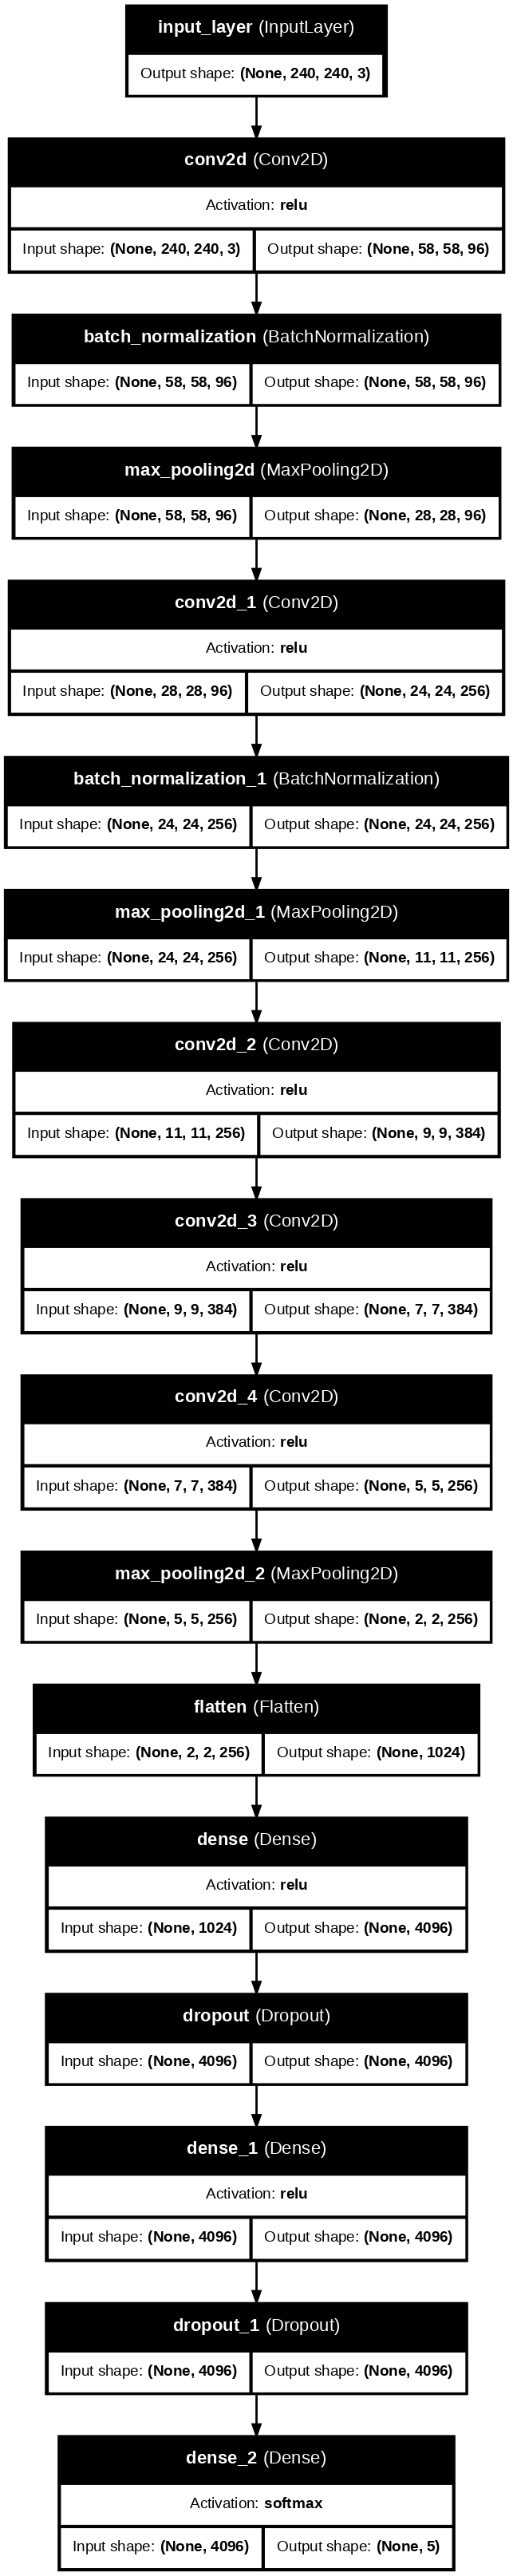

In [30]:
tf.keras.utils.plot_model(
    model_Alex,
    to_file='alex_model.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    show_layer_activations=True,
    dpi=100
)

In [31]:
model_Alex.compile(loss=BinaryCrossentropy(),
              optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [32]:
Alex_model = model_Alex.fit(trainDataset, epochs=20, validation_data=valDataset)

Epoch 1/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 93s 603ms/step - accuracy: 0.3349 - loss: 0.9115 - val_accuracy: 0.2700 - val_loss: 0.5640
Epoch 2/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 293ms/step - accuracy: 0.7350 - loss: 0.2485 - val_accuracy: 0.4842 - val_loss: 0.4650
Epoch 3/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 293ms/step - accuracy: 0.8575 - loss: 0.1472 - val_accuracy: 0.8566 - val_loss: 0.1574
Epoch 4/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 290ms/step - accuracy: 0.9132 - loss: 0.0961 - val_accuracy: 0.8529 - val_loss: 0.1448
Epoch 5/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 291ms/step - accuracy: 0.9288 - loss: 0.0766 - val_accuracy: 0.9013 - val_loss: 0.1022
Epoch 6/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 293ms/step - accuracy: 0.9428 - loss: 0.0627 - val_accuracy: 0.9069 - val_loss: 0.1164
Epoch 7/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 293ms/step - accuracy: 0.9540 - loss: 0.0536 - val_accuracy: 0.9553 - val_loss: 0.0625
Epoch 8/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 289ms/step - accuracy: 0.9633 - loss: 0

Output

We can plot the output of model for each epoch. For this matter, we can use .history and extract the train and valid loss and accuracy. Then we can plot both of them and find out the path of learning.

In [33]:
training_loss_alex = Alex_model.history['loss']
val_loss_alex = Alex_model.history['val_loss']
training_acc_alex = Alex_model.history['accuracy']
val_acc_alex = Alex_model.history['val_accuracy']

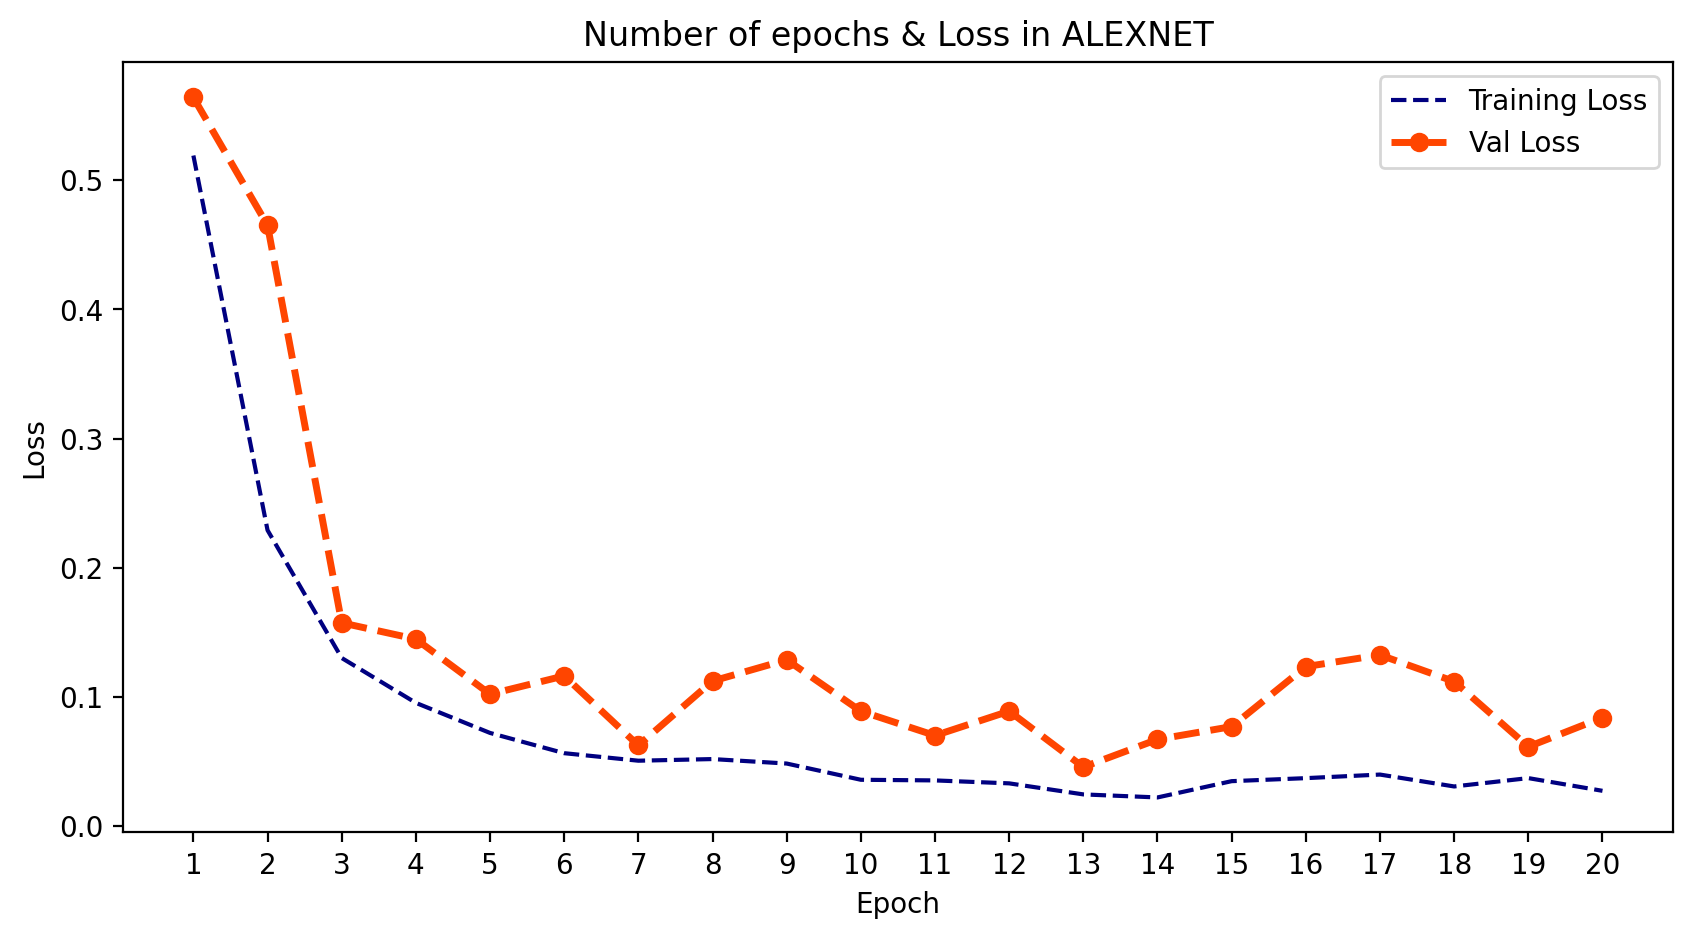

In [34]:
epoch_count = range(1, len(training_loss_alex) + 1)

# Visualize loss history
plt.figure(figsize=(10,5), dpi=200)
plt.plot(epoch_count, training_loss_alex, 'r--', color= 'navy')
plt.plot(epoch_count, val_loss_alex, '--bo',color= 'orangered', linewidth = '2.5', label='line with marker')
plt.legend(['Training Loss', 'Val Loss'])
plt.title('Number of epochs & Loss in ALEXNET')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(np.arange(1,21,1))
plt.show();

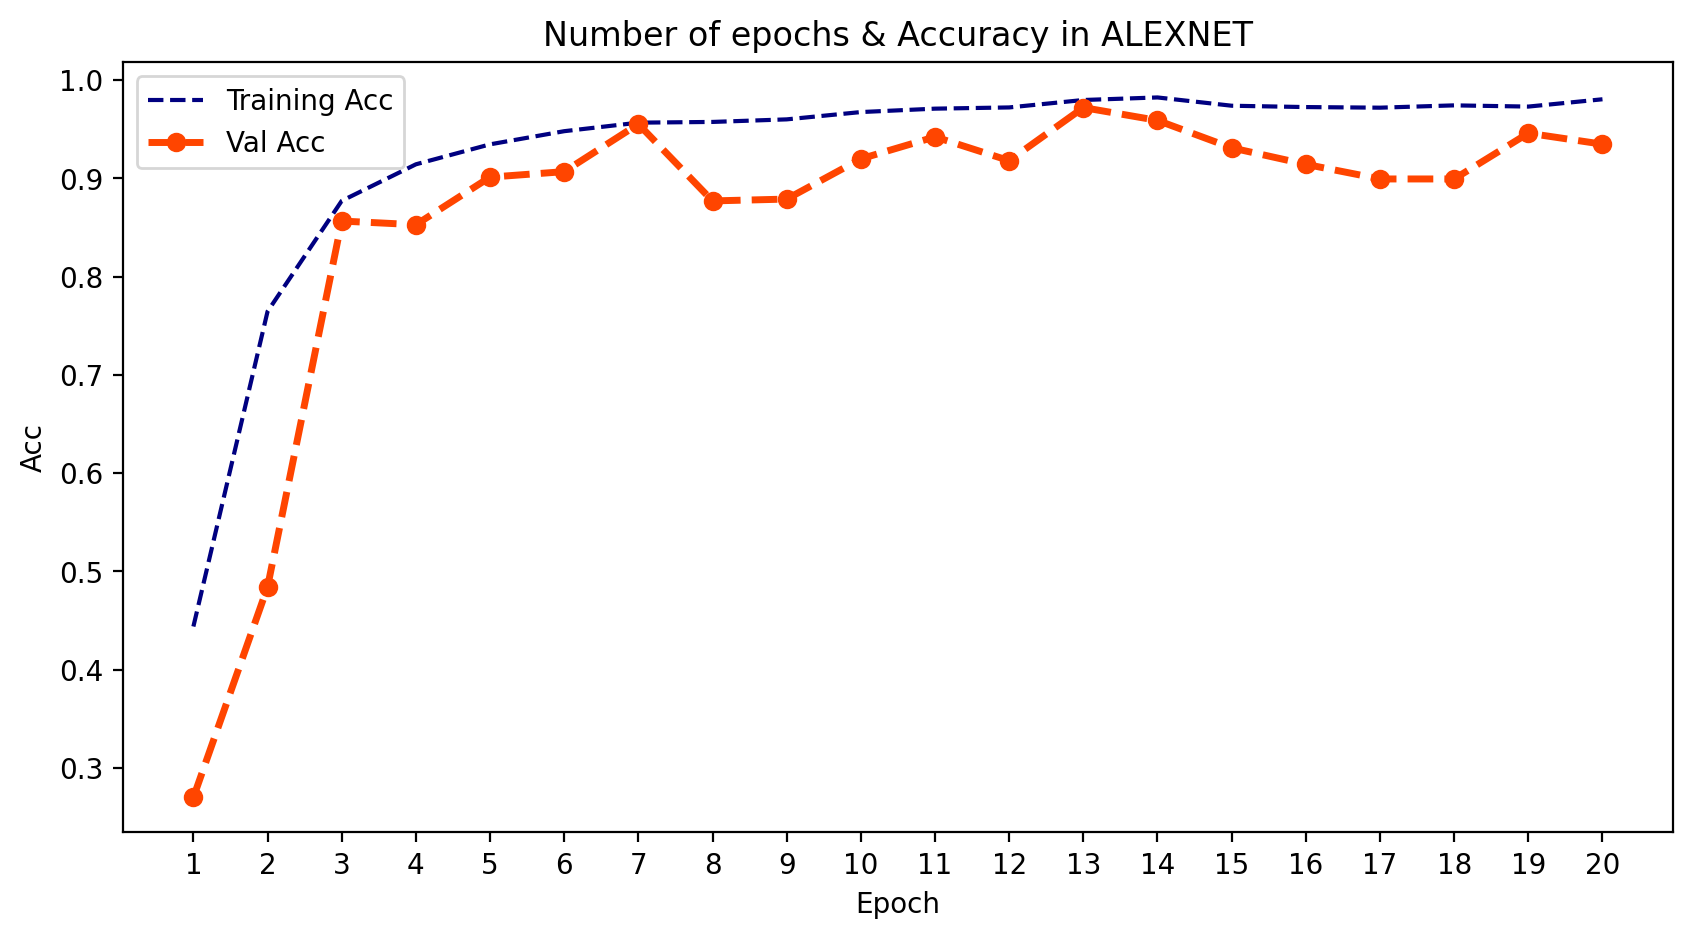

In [35]:
plt.figure(figsize=(10,5), dpi=200)
plt.plot(epoch_count, training_acc_alex, 'r--', color= 'navy')
plt.plot(epoch_count, val_acc_alex, '--bo',color= 'orangered', linewidth = '2.5', label='line with marker')
plt.legend(['Training Acc', 'Val Acc'])
plt.title('Number of epochs & Accuracy in ALEXNET')
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.xticks(np.arange(1,21,1))
plt.plot();
plt.show();

**VGGNet**

VGGNet, also known as Visual Geometry Group, is a standard deep Convolutional Neural Network (CNN) architecture with multiple layers. The “deep” refers to the number of layers with VGG-16 or VGG-19 consisting of 16 and 19 convolutional layers, respectively. The VGG architecture is the basis of ground-breaking object recognition models. Developed as a deep neural network, the VGGNet also surpasses baselines on many tasks and datasets beyond ImageNet. Moreover, it is still one of the most popular image recognition architectures.

In [36]:
def VGGNet():
    inp = layers.Input((240, 240, 3))
    x = layers.Conv2D(64, 3, 1, activation='relu')(inp)
    x = layers.Conv2D(64, 3, 1, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(2, 2)(x)
    x = layers.Conv2D(128, 3, 1, activation='relu')(x)
    x = layers.Conv2D(128, 3, 1, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(2, 2)(x)
    x = layers.Conv2D(256, 3, 1, activation='relu')(x)
    x = layers.Conv2D(256, 3, 1, activation='relu')(x)
    x = layers.Conv2D(256, 3, 1, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(2, 2)(x)
    x = layers.Conv2D(512, 3, 1, activation='relu')(x)
    x = layers.Conv2D(512, 3, 1, activation='relu')(x)
    x = layers.Conv2D(512, 3, 1, activation='relu')(x)
    x = layers.MaxPooling2D(2, 2)(x)
    x = layers.Flatten()(x)
    x = layers.Dense(4096, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(4096, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(5, activation='softmax')(x)

    model_VGG = models.Model(inputs=inp, outputs=x)

    return model_VGG

model_VGG = VGGNet()
model_VGG.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 240, 240, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 238, 238, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 236, 236, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 236, 236, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 118, 118, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 116, 116, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 114, 114, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 114, 114, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 57, 57, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 55, 55, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 53, 53, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 51, 51, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 51, 51, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 25, 25, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 23, 23, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 21, 21, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 19, 19, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 41472)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4096)                │     169,873,4

 Total params: 194,312,261 (741.24 MB)

 Trainable params: 194,311,365 (741.24 MB)

 Non-trainable params: 896 (3.50 KB)

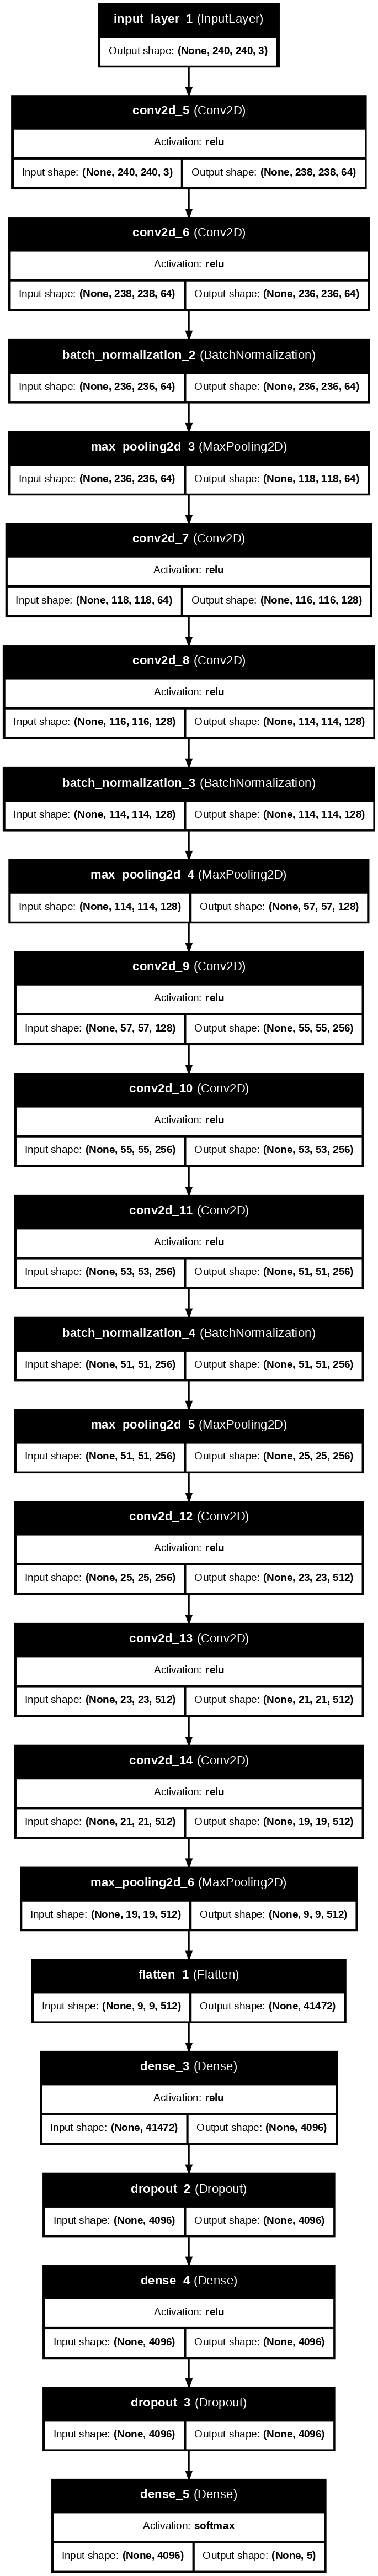

In [37]:
tf.keras.utils.plot_model(
    model_VGG,
    to_file='vgg_model.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    show_layer_activations=True,
    dpi=100
)

In [38]:
model_VGG.compile(loss=BinaryCrossentropy(),
              optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [39]:
VGG_model = model_VGG.fit(trainDataset, epochs=20, validation_data=valDataset)

Epoch 1/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 281s 2s/step - accuracy: 0.3221 - loss: 6.6267 - val_accuracy: 0.2849 - val_loss: 0.5655
Epoch 2/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 136s 1s/step - accuracy: 0.7779 - loss: 0.2182 - val_accuracy: 0.3948 - val_loss: 0.4924
Epoch 3/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 136s 1s/step - accuracy: 0.8902 - loss: 0.1211 - val_accuracy: 0.5382 - val_loss: 0.4206
Epoch 4/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 136s 1s/step - accuracy: 0.9180 - loss: 0.0943 - val_accuracy: 0.7207 - val_loss: 0.2627
Epoch 5/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 136s 1s/step - accuracy: 0.9393 - loss: 0.0712 - val_accuracy: 0.9106 - val_loss: 0.0964
Epoch 6/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 136s 1s/step - accuracy: 0.9587 - loss: 0.0489 - val_accuracy: 0.9162 - val_loss: 0.0873
Epoch 7/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 136s 1s/step - accuracy: 0.9021 - loss: 0.1013 - val_accuracy: 0.8138 - val_loss: 0.1751
Epoch 8/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 135s 1s/step - accuracy: 0.9376 - loss: 0.0714 - val_accu

Output

We can plot the output of model for each epoch. For this matter, we can use .history and extract the train and valid loss and accuracy. Then we can plot both of them and find out the path of learning.

In [40]:
training_loss_vgg = VGG_model.history['loss']
val_loss_vgg = VGG_model.history['val_loss']
training_acc_vgg = VGG_model.history['accuracy']
val_acc_vgg = VGG_model.history['val_accuracy']

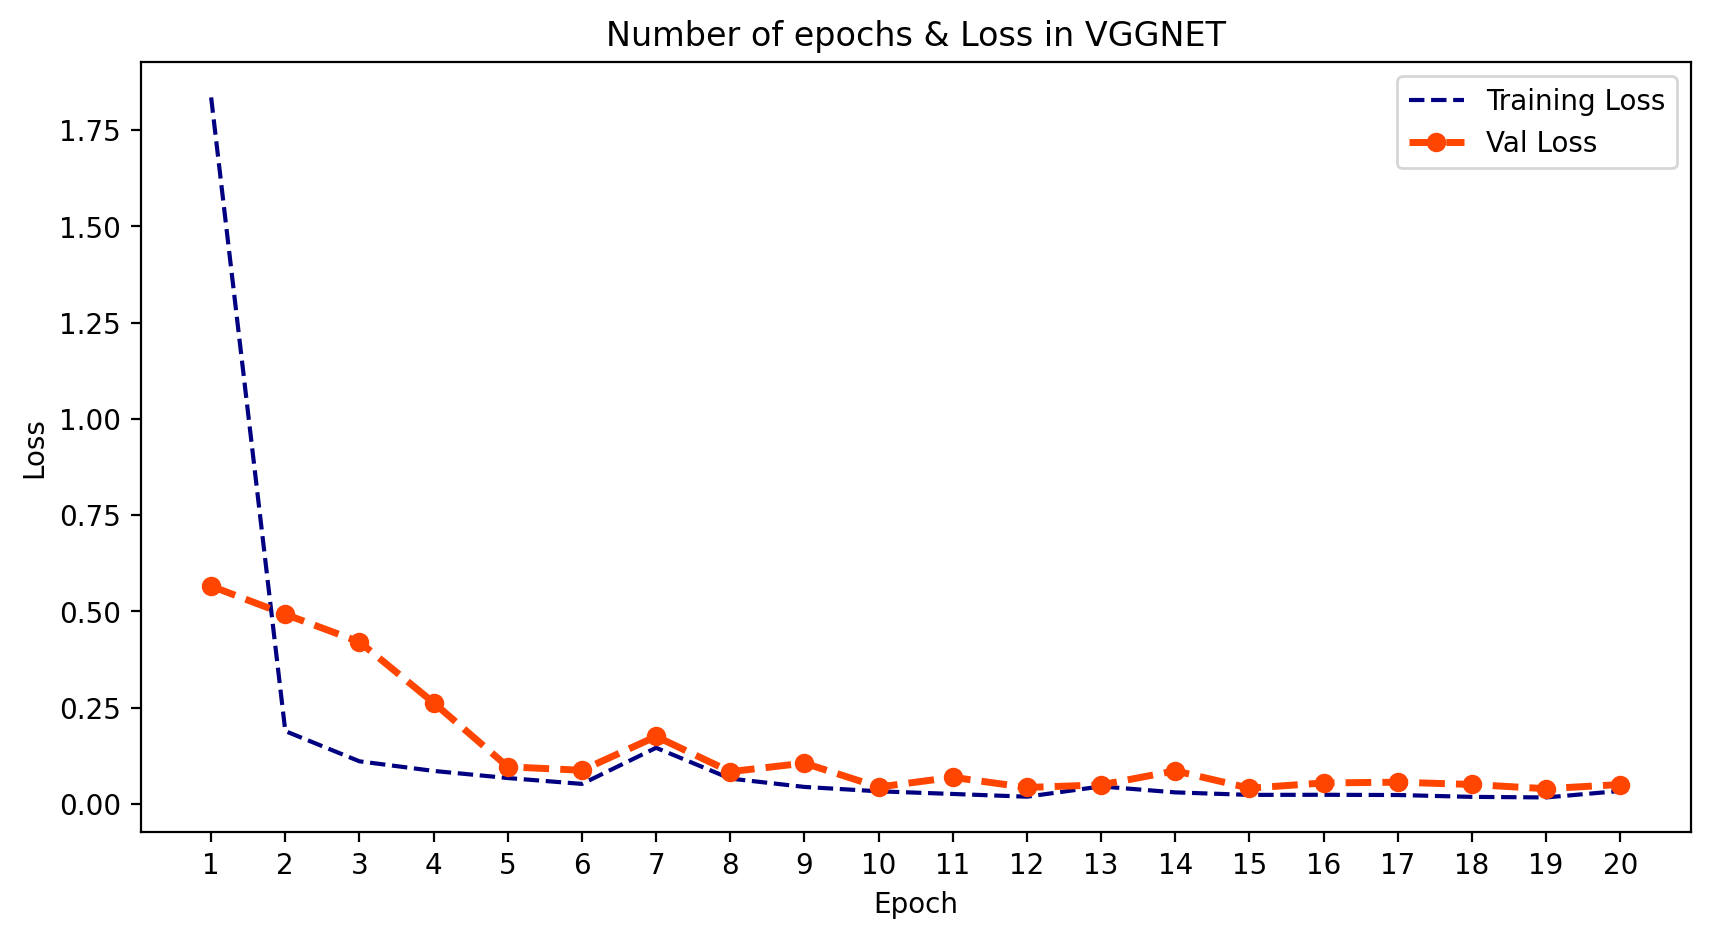

In [41]:
plt.figure(figsize=(10,5), dpi=200)
plt.plot(epoch_count, training_loss_vgg, 'r--', color= 'navy')
plt.plot(epoch_count, val_loss_vgg, '--bo',color= 'orangered', linewidth = '2.5', label='line with marker')
plt.legend(['Training Loss', 'Val Loss'])
plt.title('Number of epochs & Loss in VGGNET')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(np.arange(1,21,1))
plt.show();

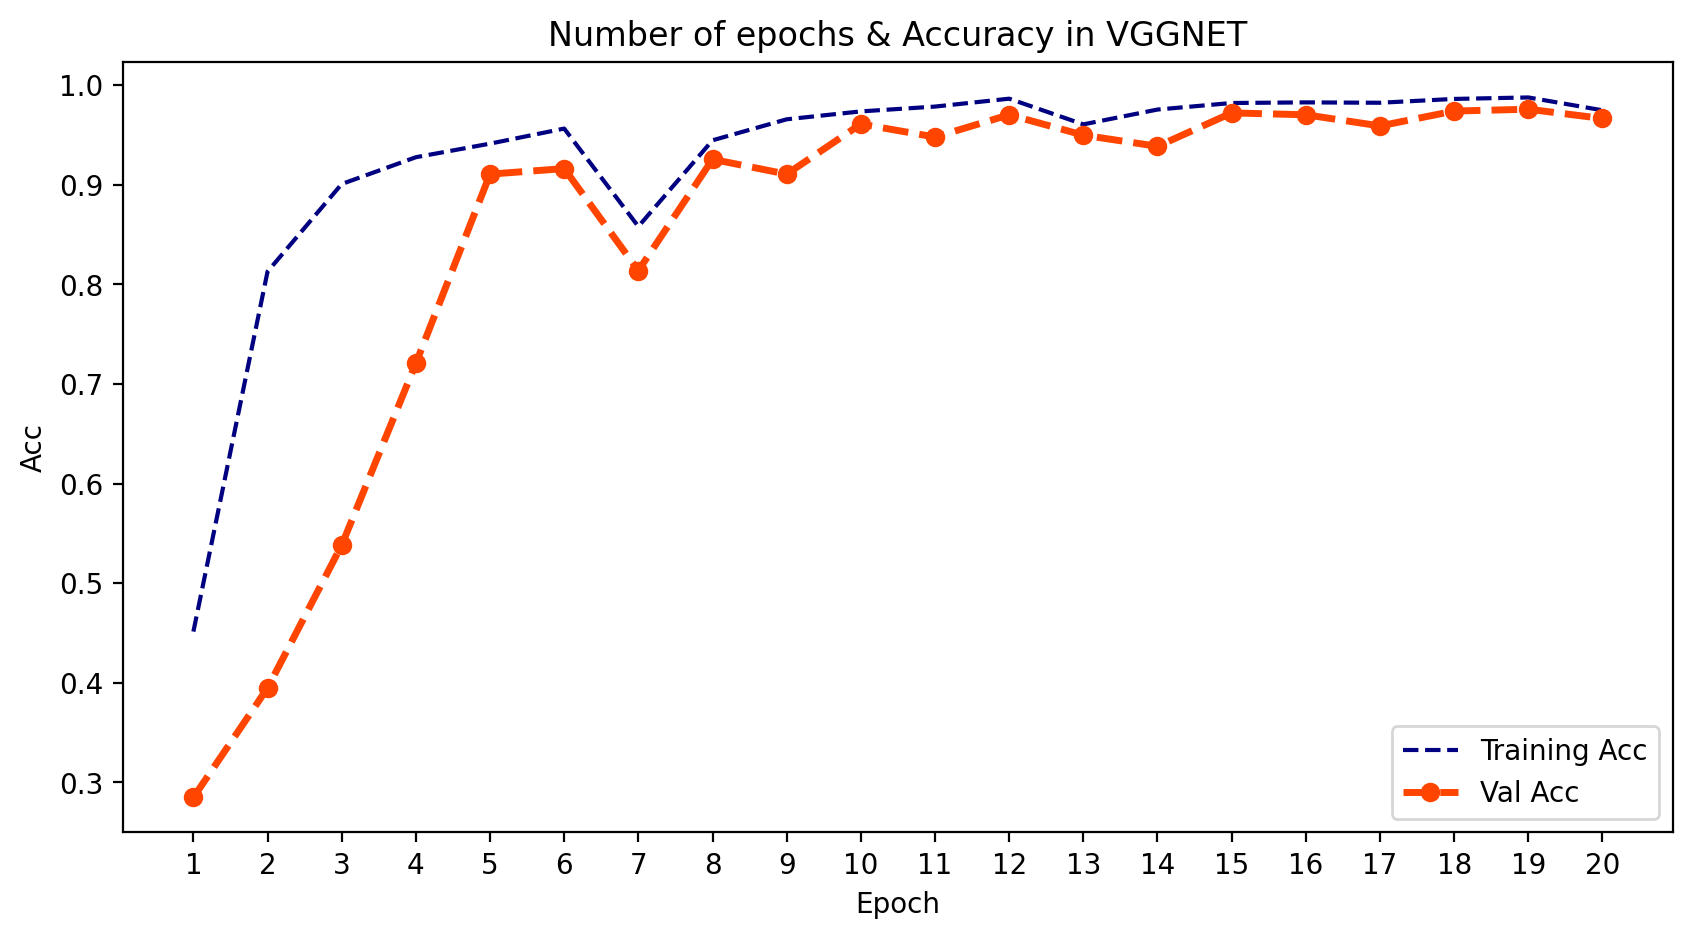

In [42]:
plt.figure(figsize=(10,5), dpi=200)
plt.plot(epoch_count, training_acc_vgg, 'r--', color= 'navy')
plt.plot(epoch_count, val_acc_vgg, '--bo',color= 'orangered', linewidth = '2.5', label='line with marker')
plt.legend(['Training Acc', 'Val Acc'])
plt.title('Number of epochs & Accuracy in VGGNET')
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.xticks(np.arange(1,21,1))
plt.plot();
plt.show();

**ResNet**

ResNet (Residual Network) is a deep learning-based model that uses residual connections to improve training performance and accuracy. The architecture of ResNet is designed to solve the problem of vanishing gradients that occurs when training deep neural networks. ResNet introduces the concept of residual blocks, which use skip connections to connect activations of a layer to further layers by skipping some layers in between. This forms a residual block, and ResNets are made by stacking these residual blocks together. The approach behind this network is instead of layers learning the underlying mapping, we allow the network to fit the residual mapping. So, instead of say H (x), initial mapping, let the network fit, F (x) := H (x) - x which gives H (x) := F (x) + x. The skip connection connects activations of a layer to further layers by skipping some layers in between. This results in training a very deep neural network without the problems caused by vanishing/exploding gradient. ResNet is widely used in image classification tasks and has inspired many other CNN architectures that have been developed since its introduction.

In [43]:
def ResNet34 ():
    inp = layers.Input((240, 240, 3))
    x = layers.Conv2D(64, 7, 2,padding='valid', activation='relu')(inp)
    x = layers.MaxPooling2D(strides=2, padding='same')(x)
    x = layers.Conv2D(64, 3, 1,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(64, 3, 1,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(64, 3, 1,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(64, 3, 1,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    
    
    x = layers.Conv2D(128, 3, 2,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(128, 3, 1,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(128, 3, 1,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(128, 3, 1,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
     
        
    x = layers.Conv2D(256, 3, 2,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(256, 3, 1,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(256, 3, 1,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(256, 3, 1,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(256, 3, 1,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(256, 3, 1,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    
    
    
    x = layers.Conv2D(512, 3, 2,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(512, 3, 1,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(512, 3, 1,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Flatten()(x)
    x = layers.Dense(4096, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(4096, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(5, activation='softmax')(x)
    
    
    
    
    model_Res = models.Model(inputs=inp, outputs=x)

    return model_Res

model_Res = ResNet34()
model_Res.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 240, 240, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 117, 117, 64)        │           9,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 59, 59, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 59, 59, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 59, 59, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 59, 59, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 59, 59, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 59, 59, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 59, 59, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 59, 59, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 59, 59, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 30, 30, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 30, 30, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 30, 30, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 30, 30, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 30, 30, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 30, 30, 128)         │         147,5

 Total params: 160,858,117 (613.63 MB)

 Trainable params: 160,850,437 (613.60 MB)

 Non-trainable params: 7,680 (30.00 KB)

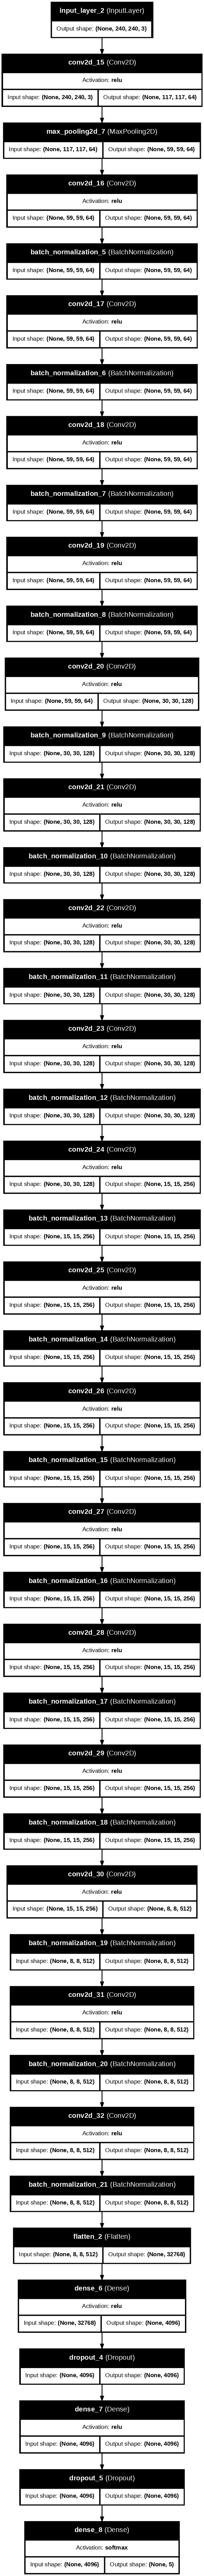

In [44]:
tf.keras.utils.plot_model(
    model_Res,
    to_file='res_model.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    show_layer_activations=True,
    dpi=100
)

In [45]:
model_Res.compile(loss=BinaryCrossentropy(),
              optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [46]:
RES_model = model_Res.fit(trainDataset, epochs=20, validation_data=valDataset)

Epoch 1/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 87s 448ms/step - accuracy: 0.2988 - loss: 1.1985 - val_accuracy: 0.2291 - val_loss: 0.6847
Epoch 2/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 43s 319ms/step - accuracy: 0.3712 - loss: 0.4400 - val_accuracy: 0.3073 - val_loss: 1.2533
Epoch 3/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 310ms/step - accuracy: 0.3599 - loss: 0.4226 - val_accuracy: 0.3259 - val_loss: 0.8133
Epoch 4/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 306ms/step - accuracy: 0.3701 - loss: 0.4069 - val_accuracy: 0.2458 - val_loss: 0.8444
Epoch 5/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 309ms/step - accuracy: 0.3684 - loss: 0.4063 - val_accuracy: 0.2812 - val_loss: 0.7070
Epoch 6/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 305ms/step - accuracy: 0.3645 - loss: 0.4006 - val_accuracy: 0.3166 - val_loss: 0.6432
Epoch 7/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 42s 312ms/step - accuracy: 0.3641 - loss: 0.4116 - val_accuracy: 0.2291 - val_loss: 0.5394
Epoch 8/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 42s 313ms/step - accuracy: 0.3770 - loss: 0

 Output

We can plot the output of model for each epoch. For this matter, we can use .history and extract the train and valid loss and accuracy. Then we can plot both of them and find out the path of learning.

In [47]:
training_loss_res = RES_model.history['loss']
val_loss_res = RES_model.history['val_loss']
training_acc_res = RES_model.history['accuracy']
val_acc_res = RES_model.history['val_accuracy']

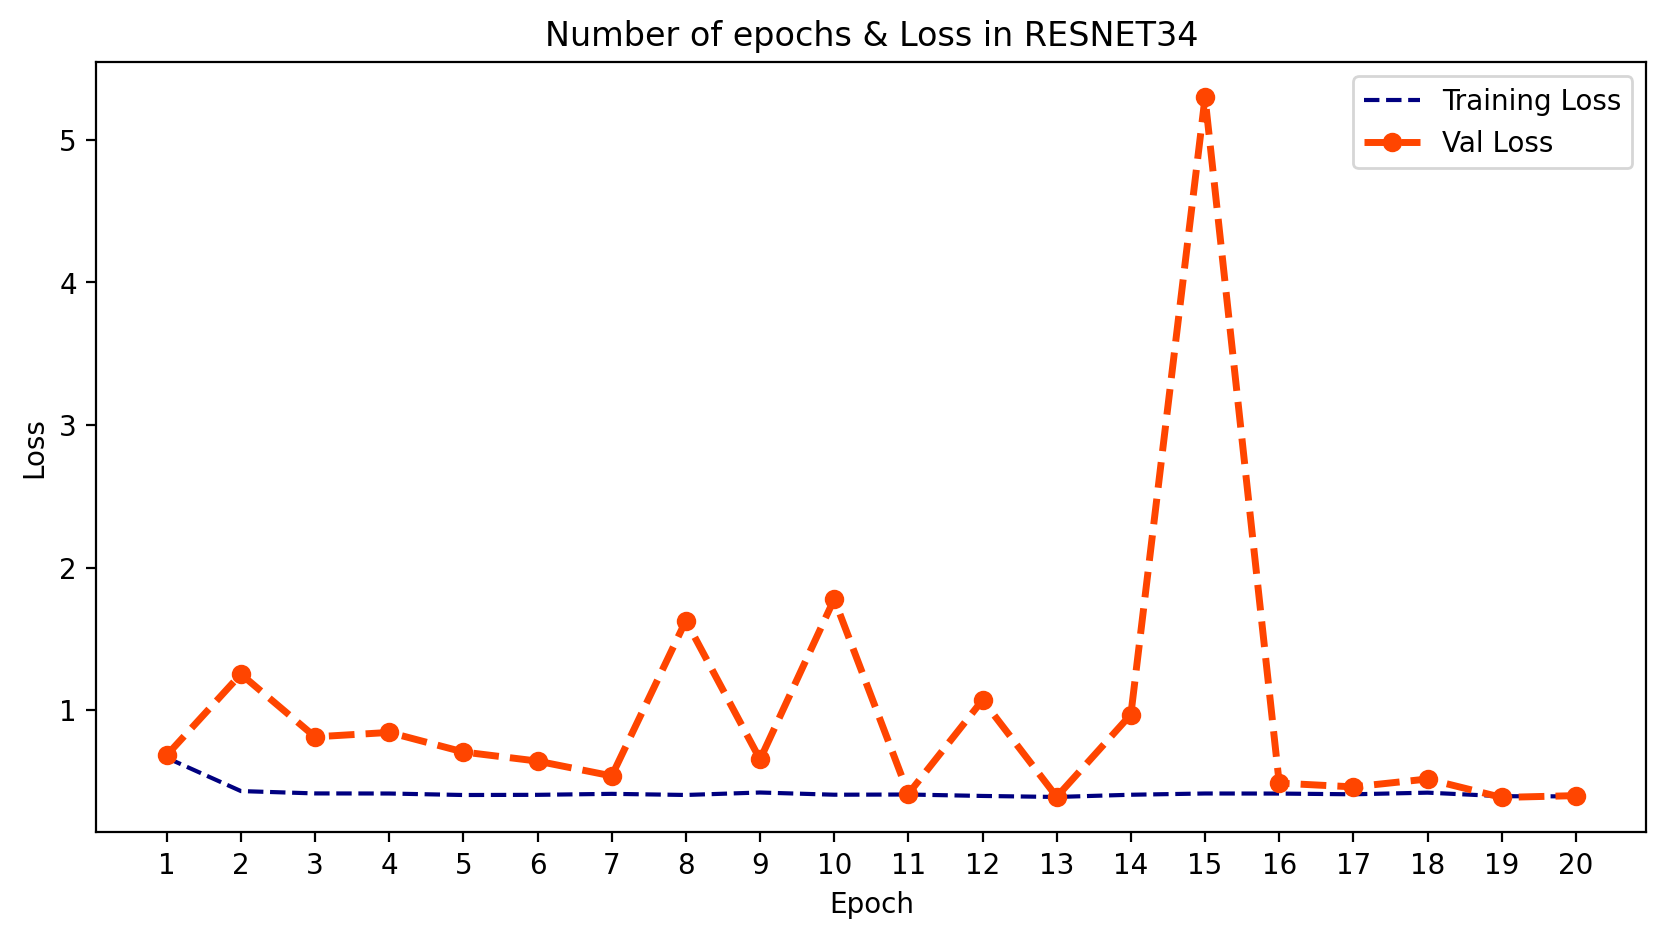

In [48]:
plt.figure(figsize=(10,5), dpi=200)
plt.plot(epoch_count, training_loss_res, 'r--', color= 'navy')
plt.plot(epoch_count, val_loss_res, '--bo',color= 'orangered', linewidth = '2.5', label='line with marker')
plt.legend(['Training Loss', 'Val Loss'])
plt.title('Number of epochs & Loss in RESNET34')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(np.arange(1,21,1))
plt.show();

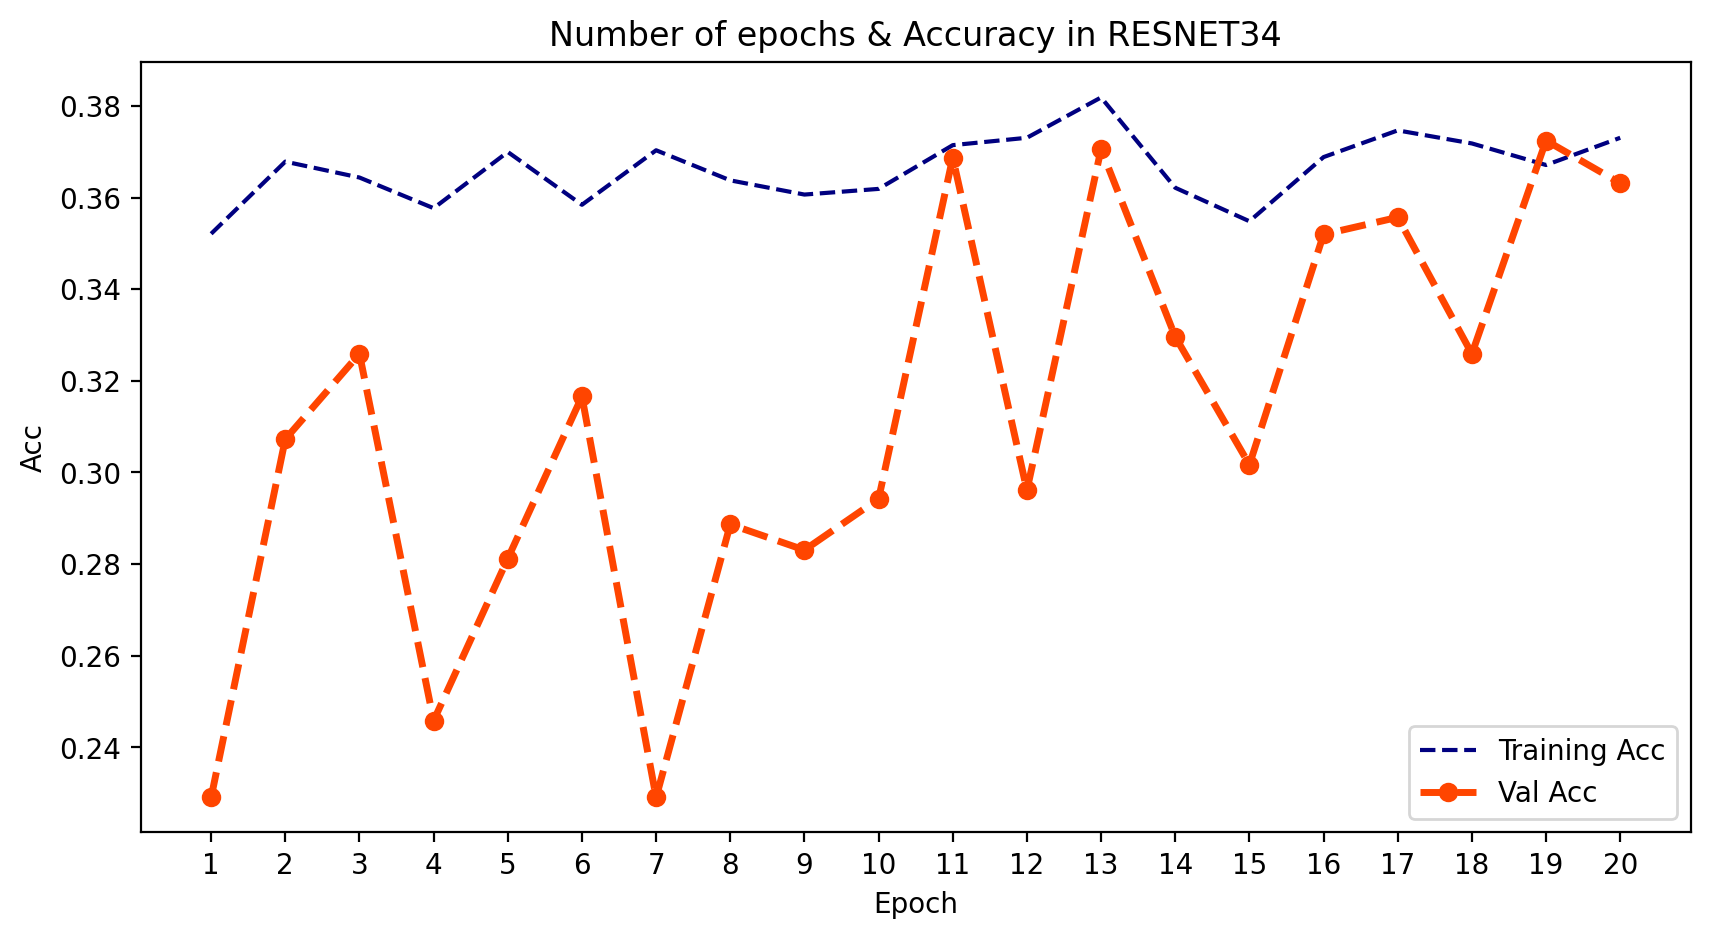

In [49]:
plt.figure(figsize=(10,5), dpi=200)
plt.plot(epoch_count, training_acc_res, 'r--', color= 'navy')
plt.plot(epoch_count, val_acc_res, '--bo',color= 'orangered', linewidth = '2.5', label='line with marker')
plt.legend(['Training Acc', 'Val Acc'])
plt.title('Number of epochs & Accuracy in RESNET34')
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.xticks(np.arange(1,21,1))
plt.plot();
plt.show();

**Result**

1. Comparision of (Acc)s and (Loss)s

We can put all of the results in a one plot and comparing the behavior of models outputs.

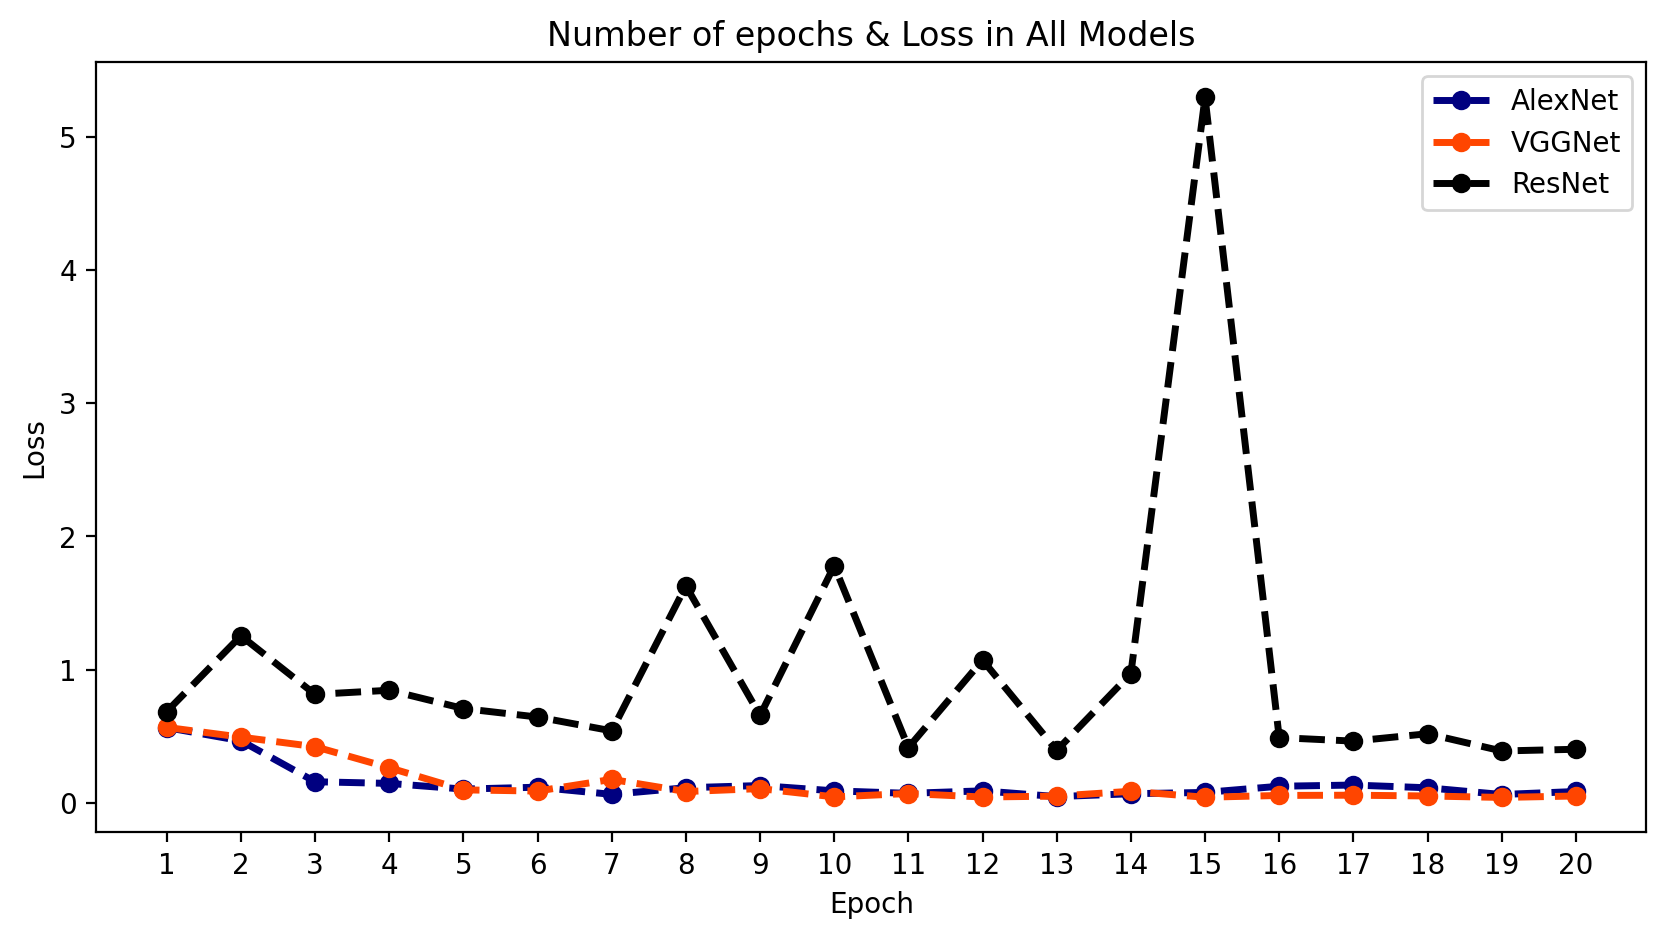

In [50]:
plt.figure(figsize=(10,5), dpi=200)

plt.plot(epoch_count, val_loss_alex, '--bo',color= 'navy',
         linewidth = '2.5', label='line with marker')
plt.plot(epoch_count, val_loss_vgg, '--bo',color= 'orangered',
         linewidth = '2.5', label='line with marker')
plt.plot(epoch_count, val_loss_res, '--bo',color= 'black',
         linewidth = '2.5', label='line with marker')
plt.legend(['AlexNet', 'VGGNet','ResNet'])
plt.title('Number of epochs & Loss in All Models')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(np.arange(1,21,1))
plt.show();

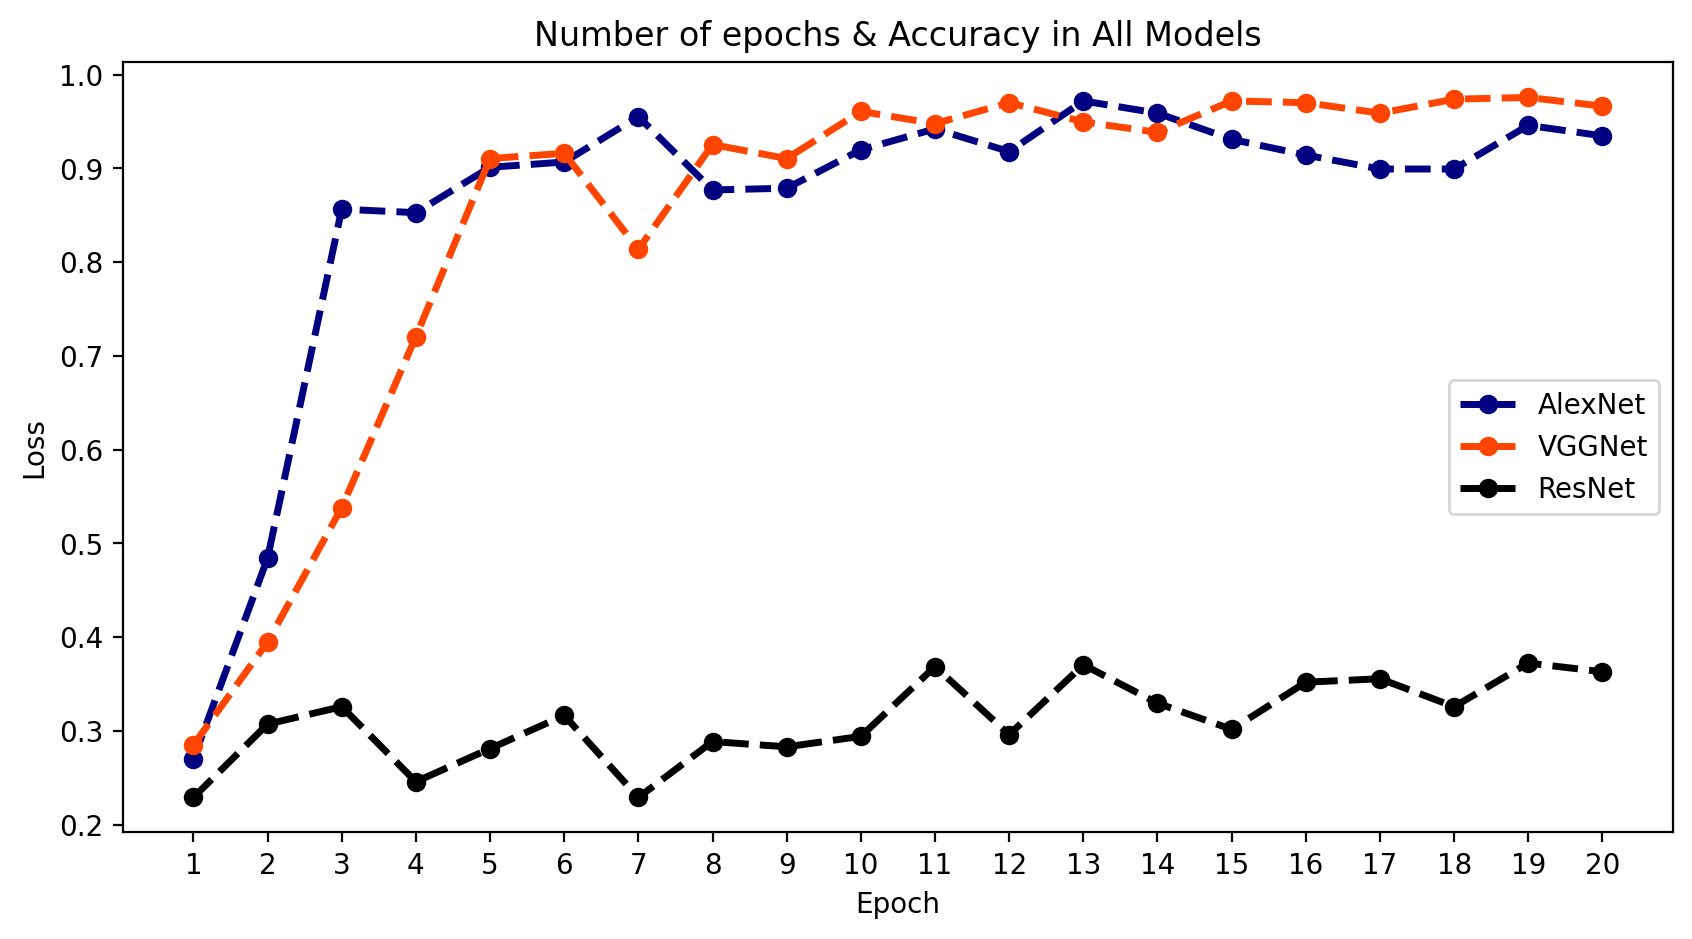

In [51]:
plt.figure(figsize=(10,5), dpi=200)

plt.plot(epoch_count, val_acc_alex, '--bo',color= 'navy',
         linewidth = '2.5', label='line with marker')
plt.plot(epoch_count, val_acc_vgg, '--bo',color= 'orangered',
         linewidth = '2.5', label='line with marker')
plt.plot(epoch_count, val_acc_res, '--bo',color= 'black',
         linewidth = '2.5', label='line with marker')
plt.legend(['AlexNet', 'VGGNet','ResNet'])
plt.title('Number of epochs & Accuracy in All Models')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(np.arange(1,21,1))
plt.show();

2. Conclusion

As we can see, the result of AlexNet and VGGNet is good but the ResNet model not fitted in a good way. This is what i was mentioned about why we have to use more than one structure models.